<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 2. Basics
## Taylor series
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we approximate the function $f(x)=\sin(x)$ with a **Taylor series expansion**. 
We first import the `python` libraries needed.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Approximate Sinus-function with Taylor series

Create and plot Sinus function $f(x)=\sin(x)$ in $x \in [0,2\pi]$. 

1 (21,) [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604 6.28318531]
1 (21,) [ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.22464680e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01
 -2.44929360e-16]


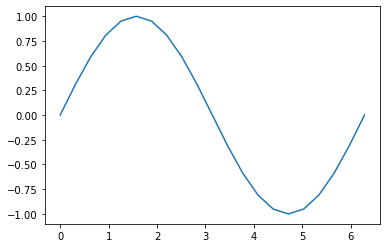

In [2]:
def f(x):
    # define function 
    y = np.sin(x)
    return y

# create variable array and calculate function
x = np.linspace(0,2*np.pi,21)
y = f(x)

# plot function
print (x.ndim,x.shape,x)
print (y.ndim,y.shape,y)
plt.plot(x,y)

Approximate function $f(x)$ through Taylor series $P(x)$ around point $x_0$:
$$
P(x) \simeq \sum_{k=0}^{n} {{f^{(k)}(x_0)}\over{k!}} (x-x_0)^k
$$

In [3]:
import sys
def df(x,n):
    # define function and derivatives
    if (n == 0):
        y = np.sin(x)
    elif (n == 1):
        y = np.cos(x)
    elif (n == 2):
        y = -np.sin(x)
    elif (n == 3):
        y = -np.cos(x)
    elif (n == 4):
        y = np.sin(x)
    elif (n == 5):
        y = np.cos(x)
    else:
        sys.exit ('n > 5 not implemented')
    return y

def fac(n):
    # define factorial
    fac = 1
    if (n == 0):
        return fac
    elif (n == 1):
        return fac
    else:
        for i in np.arange(n,1,step=-1):
            fac = fac*i
        return fac

def taylor(x,x0=0,n=2):
    # define Taylor series
    taylor = 0.
    for i in np.arange(0,n+1):
        deriv = df(x0,n=i)
        taylor = taylor + deriv/fac(i)*(x-x0)**i
    return taylor

Calculate the function ...

In [4]:
# define interval and calculate function and Taylor series
x = np.linspace(-2*np.pi,2*np.pi,41)
y = f(x)
y2 = taylor(x,x0=0,n=2)

Plot the function ...

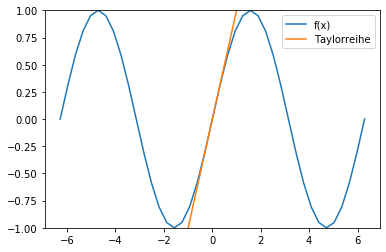

In [5]:
# plot series
plt.ylim([-1,1])
plt.plot(x,y,label='f(x)')
plt.plot(x,y2,label='Taylorreihe')
plt.legend()

Use build-in python3 function for derivatives.

In [6]:
%matplotlib inline
import numpy as np
from scipy.misc import derivative as deriv
import matplotlib.pyplot as plt
import sys

def f(x):
    y = np.sin(x)
    return y

def df(x,n):
    # define function and derivatives
    if (n % 2 == 0):
        order = n+1
    else:
        order = n+2
    y = deriv(f,x,dx=0.1,n=n,order=order)
    return y

def fac(n):
    # define factorial
    fac = 1
    if (n == 0):
        return fac
    elif (n == 1):
        return fac
    else:
        for i in np.arange(n,1,step=-1):
            fac = fac*i
        return fac

def taylor(x,x0=0,n=2):
    # define Taylor series
    taylor = 0.
    for i in np.arange(0,n+1):
        deriv = df(x0,n=i)
        taylor = taylor + deriv/fac(i)*(x-x0)**i
    return taylor

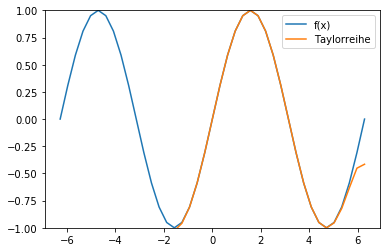

In [7]:
# define interval and calculate function and Taylor series
x = np.linspace(-2*np.pi,2*np.pi,41)
y = f(x)
y2 = taylor(x,x0=2,n=15)

# plot series
plt.ylim([-1,1])
plt.plot(x,y,label='f(x)')
plt.plot(x,y2,label='Taylorreihe')
plt.legend()

****
## Examples

1. $f(x)=e^x$

The Taylor series for $x_0=0$ is
$$
T(x)= \sum\limits_{n=0}^{\infty} \frac{x^n}{n!}
$$

In [8]:
def factorial(n):
    factorial = np.prod(range(1,n+1))
    return factorial

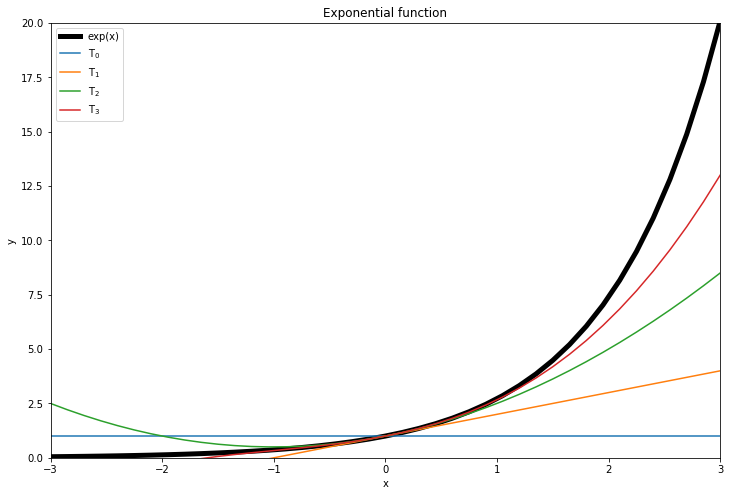

In [9]:
"""
Taylor series of exponential function
"""
a=-3
b=3
n=41
x=np.linspace(a,b,n)
y=np.exp(x)
T0=np.ones(n)
T1=1+x
T2=1+x+x**2/factorial(2)
T3=1+x+x**2/factorial(2)+x**3/factorial(3)

plt.figure(figsize=(12,8))
plt.xlim([a,b])
plt.ylim([0,20])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential function')
plt.plot(x,y,linewidth=5,color='black',label='exp(x)')
plt.plot(x,T0,label='T$_0$')
plt.plot(x,T1,label='T$_1$')
plt.plot(x,T2,label='T$_2$')
plt.plot(x,T3,label='T$_3$')
plt.legend()

2. $f(x)=\frac{1}{1-x}$

The Taylor series for $x_0=0$ is
$$
T(x)= \sum\limits_{n=0}^{\infty} x^n
$$

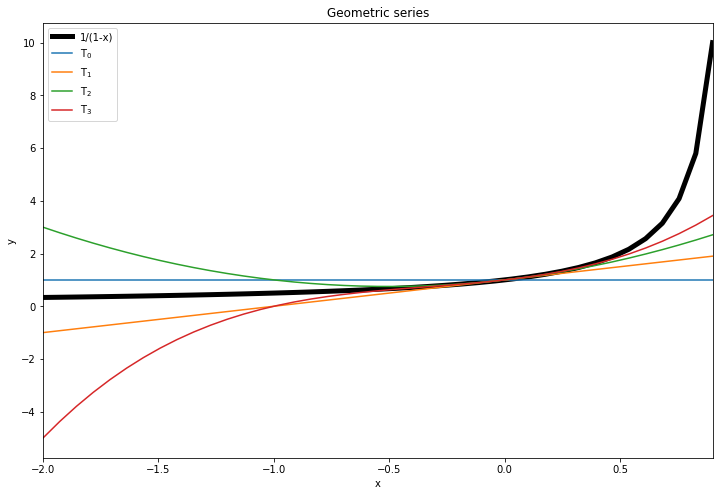

In [10]:
"""
Taylor series of geometrical series
"""
a=-2
b=0.9
n=41
x=np.linspace(a,b,n)
y=1/(1-x)
T0=np.ones(n)
T1=1+x
T2=1+x+x**2
T3=1+x+x**2+x**3

plt.figure(figsize=(12,8))
plt.xlim([a,b])
#plt.ylim([0,20])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geometric series')
plt.plot(x,y,linewidth=5,color='black',label='1/(1-x)')
plt.plot(x,T0,label='T$_0$')
plt.plot(x,T1,label='T$_1$')
plt.plot(x,T2,label='T$_2$')
plt.plot(x,T3,label='T$_3$')
plt.legend()

3. $f(x)=\sin(x)$

The Taylor series for $x_0=0$ is
$$
T(x)= \sum\limits_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}
$$

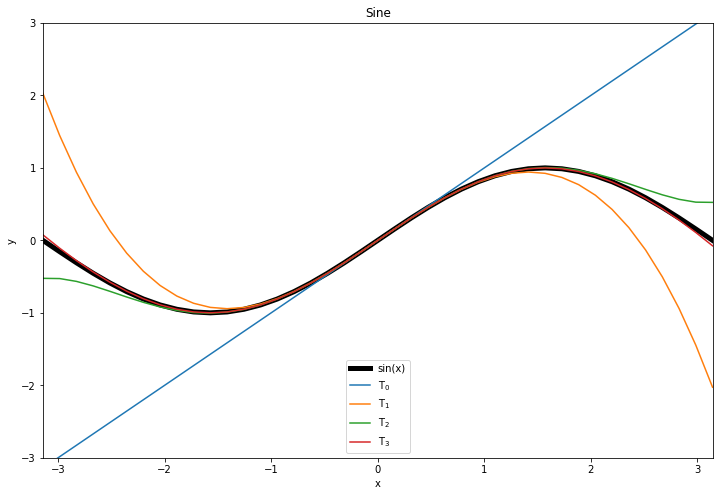

In [11]:
"""
Taylor series of sine
"""
a=-np.pi
b=np.pi
n=41
x=np.linspace(a,b,n)
y=np.sin(x)
T0=x
T1=x-x**3/factorial(3)
T2=x-x**3/factorial(3)+x**5/factorial(5)
T3=x-x**3/factorial(3)+x**5/factorial(5)-x**7/factorial(7)

plt.figure(figsize=(12,8))
plt.xlim([a,b])
plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine')
plt.plot(x,y,linewidth=5,color='black',label='sin(x)')
plt.plot(x,T0,label='T$_0$')
plt.plot(x,T1,label='T$_1$')
plt.plot(x,T2,label='T$_2$')
plt.plot(x,T3,label='T$_3$')
plt.legend()

4. $f(x)=\cos(x)$

The Taylor series for $x_0=0$ is
$$
T(x)= \sum\limits_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n}
$$

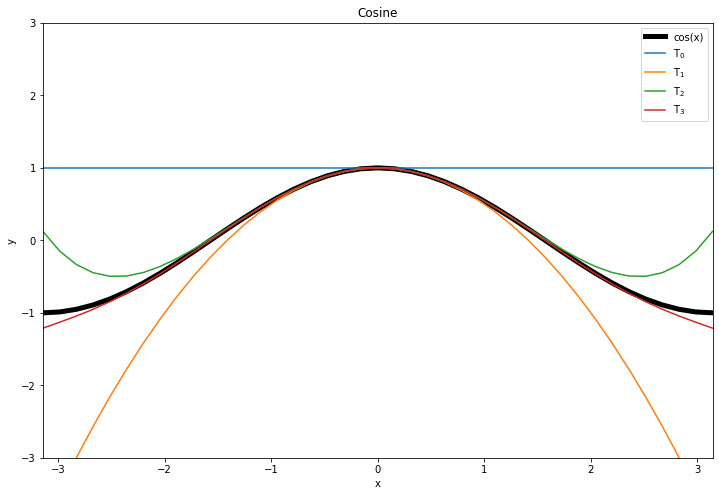

In [12]:
"""
Taylor series of cosine
"""
a=-np.pi
b=np.pi
n=41
x=np.linspace(a,b,n)
y=np.cos(x)
T0=np.ones(n)
T1=1-x**2/factorial(2)
T2=1-x**2/factorial(2)+x**4/factorial(4)
T3=1-x**2/factorial(2)+x**4/factorial(4)-x**6/factorial(6)

plt.figure(figsize=(12,8))
plt.xlim([a,b])
plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine')
plt.plot(x,y,linewidth=5,color='black',label='cos(x)')
plt.plot(x,T0,label='T$_0$')
plt.plot(x,T1,label='T$_1$')
plt.plot(x,T2,label='T$_2$')
plt.plot(x,T3,label='T$_3$')
plt.legend()

****
## Weird function to play with ...

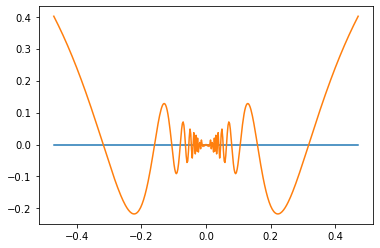

In [13]:
n=401
x=np.linspace(-0.15*np.pi,0.15*np.pi,n)
y=np.zeros(n)
for i in range(len(x)):
    if(x[i]!=0):
       y[i]=x[i]*np.sin(1/x[i])
#y=x*np.sin(1/x)
plt.plot([-0.15*np.pi,0.15*np.pi],[0.,0.])
plt.plot(x,y)

... done